In [3]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

music_label_map_file = "/root/v2/muzic/virtuosonet/label_2round_mean_reg_19_with0_rm_highstd0.json"
music_label_map = json.load(open(music_label_map_file))
filename = "/root/v2/muzic/virtuosonet/checkpoints_2rounds_align/randomfold/level/fold7/yml_path_ymls/shared/label19/han_bigger256_concat.yml_multi_level_measure_no_augment_True_label_file_path_label_2round_mean_reg_19_with0_rm_highstd0.json_batch_size_8_lr_2.5e-05_intermediate_loss_False_2311300140/results_randomfold.json"

label_stds = json.load(open("/root/v2/muzic/virtuosonet/label_2round_std_reg_19_with0_rm_highstd0.json")) # shape of [1, 19] for each performance

with open(filename) as f:
    tmp_json_file = json.load(f)
# fix keys.
json_file = {}
for k, v in tmp_json_file.items():
    k = k.split("/")[-1].strip(".mid")
    json_file[k] = np.array(v).mean(axis=0)


/tmp/ipykernel_70296/3434696579.py:51: RuntimeWarning: Mean of empty slice.
  bin_mse_avg.append(bin_mses[-1].mean())
/root/anaconda3/envs/virtuoso/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


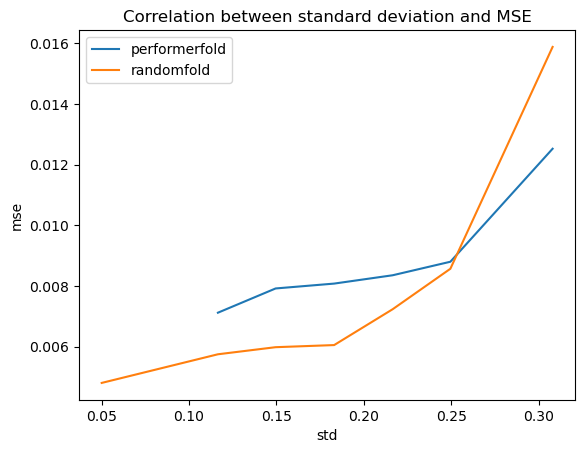

In [22]:
# print mse- std correlation of two files (performerfold, randomfold) together
filename1 = "/root/v2/muzic/virtuosonet/checkpoints_2rounds_align/performerfold/level/note/fold3/yml_path_ymls/shared/label19/han_bigger256_concat.yml_multi_level_measure_no_augment_True_label_file_path_label_2round_mean_reg_19_with0_rm_highstd0.json_batch_size_8_lr_2.5e-05_intermediate_loss_False_2402121953/results_performfold.json"
filename2 = "/root/v2/muzic/virtuosonet/checkpoints_2rounds_align/randomfold/level/fold7/yml_path_ymls/shared/label19/han_bigger256_concat.yml_multi_level_measure_no_augment_True_label_file_path_label_2round_mean_reg_19_with0_rm_highstd0.json_batch_size_8_lr_2.5e-05_intermediate_loss_False_2311300140/results_randomfold.json"

label_stds = json.load(open("/root/v2/muzic/virtuosonet/label_2round_std_reg_19_with0_rm_highstd0.json")) # shape of [1, 19] for each performance
music_label_map = json.load(open("/root/v2/muzic/virtuosonet/label_2round_mean_reg_19_with0_rm_highstd0.json"))

with open(filename1) as f:
    tmp_json_file = json.load(f)
# fix keys.
json_file1 = {}
for k, v in tmp_json_file.items():
    k = k.split("/")[-1].strip(".mid")
    json_file1[k] = np.array(v).mean(axis=0)

with open(filename2) as f:
    tmp_json_file = json.load(f)
# fix keys.
json_file2 = {}
for k, v in tmp_json_file.items():
    k = k.split("/")[-1].strip(".mid")
    json_file2[k] = np.array(v).mean(axis=0)
    
# what I want to prove: for each data, averaged mse is high if std is high.
std_mse_list1 = {}
for k, v in json_file1.items():
    pred = np.array(v)
    std = np.array(label_stds[k])
    label = np.array(music_label_map[k][:-1])
    mse = (pred - label) ** 2
    std_mse_list1[k] = (std.mean(), mse.mean())
# draw 1 averaged plot
std_mse1 = []
for k, v in std_mse_list1.items():
    std_mse1.append(v)
std_mse1 = sorted(std_mse1, key=lambda x: x[0])
stds1 = [x[0] for x in std_mse1]
mses1 = [x[1] for x in std_mse1]


# binning
stds = np.array(stds1)
mses = np.array(mses1)
bins = [0, 0.1, 0.133, 0.166, 0.2, 0.233,  0.266, 0.35]

bin_mses = []
bin_mse_avg = []
for j in range(len(bins) - 1):
    bin_mses.append(mses[(stds >= bins[j]) & (stds < bins[j+1])])
    # average
    bin_mse_avg.append(bin_mses[-1].mean())
x_label = [bins[i] + (bins[i+1] - bins[i]) / 2 for i in range(len(bins) - 1)]
# draw averaged plot
plt.figure()
plt.title(f"Correlation between standard deviation and MSE")
plt.plot(x_label, bin_mse_avg)
plt.xlabel("std")
plt.ylabel("mse")


# do same for file2, and draw in same plot
std_mse_list2 = {}
for k, v in json_file2.items():
    pred = np.array(v)
    std = np.array(label_stds[k])
    label = np.array(music_label_map[k][:-1])
    mse = (pred - label) ** 2
    std_mse_list2[k] = (std.mean(), mse.mean())
# draw 1 averaged plot
std_mse2 = []
for k, v in std_mse_list2.items():
    std_mse2.append(v)
std_mse2 = sorted(std_mse2, key=lambda x: x[0])
stds2 = [x[0] for x in std_mse2]
mses2 = [x[1] for x in std_mse2]

# binning
stds = np.array(stds2)
mses = np.array(mses2)
bins = [0, 0.1, 0.133, 0.166, 0.2, 0.233,  0.266, 0.35]

bin_mses = []
bin_mse_avg = []
for j in range(len(bins) - 1):
    bin_mses.append(mses[(stds >= bins[j]) & (stds < bins[j+1])])
    # average
    bin_mse_avg.append(bin_mses[-1].mean())
x_label = [bins[i] + (bins[i+1] - bins[i]) / 2 for i in range(len(bins) - 1)]
# draw averaged plot
plt.plot(x_label, bin_mse_avg)
plt.legend(["performerfold", "randomfold"])
plt.show()
